# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [ ]:
# Update the PATH to include the user installation directory.
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [ ]:
# Install requirements
!python -m pip install -r requirements.txt

  Using cached opencv-python-headless-4.5.3.56.tar.gz (89.2 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
# Define transforms
## YOUR CODE HERE ##
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Create training set and define training dataloader
## YOUR CODE HERE ##
train = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)

# Create test set and define test dataloader
## YOUR CODE HERE ##
test = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(test, batch_size=64, shuffle=False)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?
Ans: I choose Normalize((0.5,), (0.5,)): Normalizes the images with a mean and standard deviation of 0.5, and ToTensor(): Converts the images to PyTorch tensors.

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [3]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

7


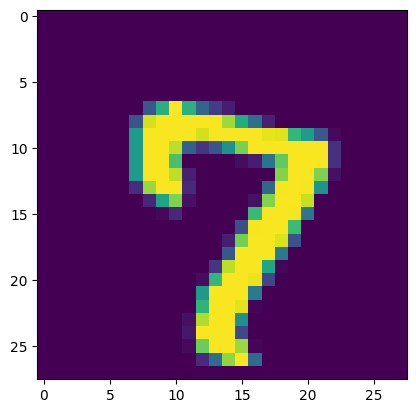

1


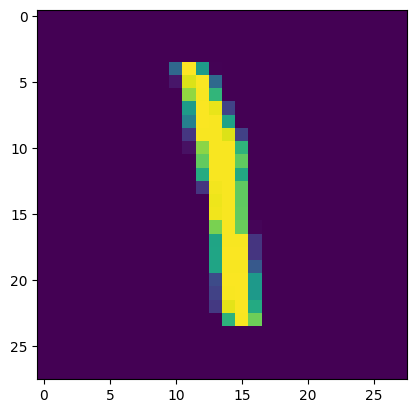

6


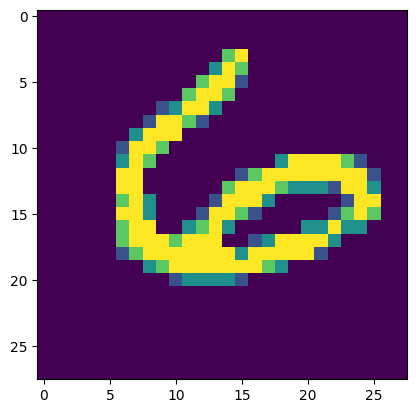

2


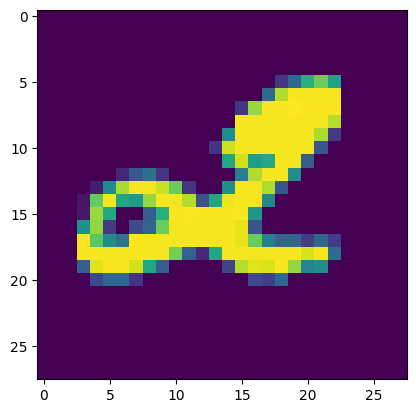

8


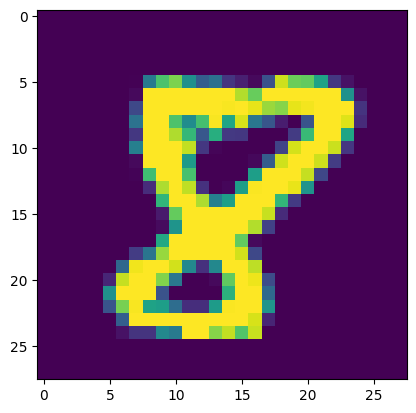

In [4]:
# Explore data
## YOUR CODE HERE ##
show5(trainloader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [5]:
# # YOUR CODE HERE ## 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28 * 28, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 10)
    self.flatten = nn.Flatten()

  def forward(self, x):

    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.softmax(self.fc4(x), dim=1)

    return x

net = Network()
net.to(device)

Network(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (flatten): Flatten(start_dim=1, end_dim=-1)
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [6]:
## YOUR CODE HERE ##
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.001)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch.
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [7]:
## YOUR CODE HERE ##
num_epochs = 10

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(trainloader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).float().mean().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {(train_correct/len(trainloader) * 100):.2f}% training loss: {train_loss/len(trainloader):.5f}')
    train_loss_history.append(train_loss/len(trainloader))


    val_loss = 0.0
    val_correct = 0
    net.eval()
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).float().mean().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {(val_correct/len(testloader)) * 100:.2f}% validation loss: {val_loss/len(testloader):.5f}')
    val_loss_history.append(val_loss/len(testloader))

Epoch 1 training accuracy: 76.85% training loss: 1.69941
Epoch 1 validation accuracy: 83.71% validation loss: 1.62415
Epoch 2 training accuracy: 84.04% training loss: 1.62116
Epoch 2 validation accuracy: 84.46% validation loss: 1.61753
Epoch 3 training accuracy: 85.53% training loss: 1.60554
Epoch 3 validation accuracy: 84.66% validation loss: 1.61409
Epoch 4 training accuracy: 93.00% training loss: 1.53197
Epoch 4 validation accuracy: 95.39% validation loss: 1.50734
Epoch 5 training accuracy: 94.87% training loss: 1.51280
Epoch 5 validation accuracy: 93.86% validation loss: 1.52249
Epoch 6 training accuracy: 95.04% training loss: 1.51103
Epoch 6 validation accuracy: 94.76% validation loss: 1.51295
Epoch 7 training accuracy: 95.59% training loss: 1.50515
Epoch 7 validation accuracy: 93.81% validation loss: 1.52277
Epoch 8 training accuracy: 95.83% training loss: 1.50320
Epoch 8 validation accuracy: 94.87% validation loss: 1.51201
Epoch 9 training accuracy: 95.96% training loss: 1.50163

Plot the training loss (and validation loss/accuracy, if recorded).

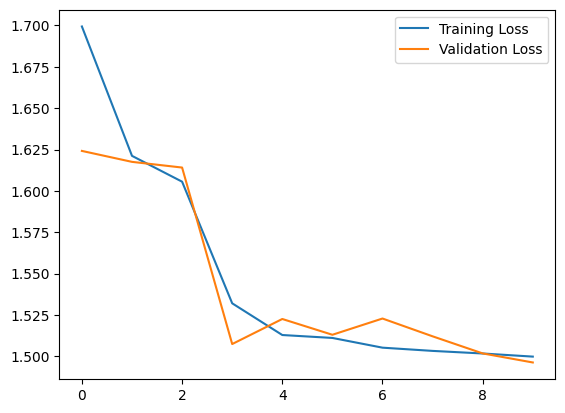

In [8]:
## YOUR CODE HERE ##
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further!
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [9]:
## YOUR CODE HERE ##
val_loss = 0.0
val_correct = 0
net.eval()
for inputs, labels in testloader:
  inputs, labels = inputs.to(device), labels.to(device)

  outputs = net(inputs)
  loss = criterion(outputs, labels)

  _, preds = torch.max(outputs.data, 1)
  val_correct += (preds == labels).float().mean().item()
  val_loss += loss.item()
  print(f' validation accuracy: {(val_correct/len(testloader)) * 100:.2f}% validation loss: {val_loss/len(testloader):.5f}')

 validation accuracy: 0.63% validation loss: 0.00940
 validation accuracy: 1.25% validation loss: 0.01884
 validation accuracy: 1.86% validation loss: 0.02839
 validation accuracy: 2.48% validation loss: 0.03789
 validation accuracy: 3.10% validation loss: 0.04737
 validation accuracy: 3.66% validation loss: 0.05734
 validation accuracy: 4.28% validation loss: 0.06685
 validation accuracy: 4.87% validation loss: 0.07664
 validation accuracy: 5.50% validation loss: 0.08597
 validation accuracy: 6.11% validation loss: 0.09553
 validation accuracy: 6.71% validation loss: 0.10522
 validation accuracy: 7.32% validation loss: 0.11475
 validation accuracy: 7.96% validation loss: 0.12408
 validation accuracy: 8.58% validation loss: 0.13359
 validation accuracy: 9.17% validation loss: 0.14341
 validation accuracy: 9.78% validation loss: 0.15291
 validation accuracy: 10.40% validation loss: 0.16238
 validation accuracy: 11.02% validation loss: 0.17189
 validation accuracy: 11.60% validation loss

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [10]:
## YOUR CODE HERE ##
net2 = Network()
net2.to(device)
criterion2 = nn.CrossEntropyLoss()
optimizer2 = optim.SGD(net.parameters(), momentum=0.9, lr = 0.01)

num_epochs = 12

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net2.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(trainloader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion2(outputs, labels)
        loss.backward()
        optimizer2.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).float().mean().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {(train_correct/len(trainloader) * 100):.2f}% training loss: {train_loss/len(trainloader):.5f}')
    train_loss_history.append(train_loss/len(trainloader))


    val_loss = 0.0
    val_correct = 0
    net.eval()
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).float().mean().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {(val_correct/len(testloader) * 100):.2f}% validation loss: {val_loss/len(testloader):.5f}')
    val_loss_history.append(val_loss/len(testloader))

print("--------------------------------------------------------------------------")
print("For Testing")

val_loss = 0.0
val_correct = 0
net.eval()
for inputs, labels in testloader:
  inputs, labels = inputs.to(device), labels.to(device)

  outputs = net(inputs)
  loss = criterion(outputs, labels)

  _, preds = torch.max(outputs.data, 1)
  val_correct += (preds == labels).float().mean().item()
  val_loss += loss.item()

  print(f' validation accuracy: {(val_correct/len(testloader) * 100):.2f}% validation loss: {val_loss/len(testloader):.5f}')

Epoch 1 training accuracy: 97.34% training loss: 1.48785
Epoch 1 validation accuracy: 97.03% validation loss: 1.49100
Epoch 2 training accuracy: 97.69% training loss: 1.48459
Epoch 2 validation accuracy: 97.14% validation loss: 1.49037
Epoch 3 training accuracy: 97.77% training loss: 1.48358
Epoch 3 validation accuracy: 97.10% validation loss: 1.49025
Epoch 4 training accuracy: 97.89% training loss: 1.48245
Epoch 4 validation accuracy: 97.25% validation loss: 1.48863
Epoch 5 training accuracy: 97.96% training loss: 1.48170
Epoch 5 validation accuracy: 97.28% validation loss: 1.48827
Epoch 6 training accuracy: 97.99% training loss: 1.48127
Epoch 6 validation accuracy: 97.39% validation loss: 1.48736
Epoch 7 training accuracy: 98.11% training loss: 1.48041
Epoch 7 validation accuracy: 97.36% validation loss: 1.48776
Epoch 8 training accuracy: 98.20% training loss: 1.47954
Epoch 8 validation accuracy: 97.34% validation loss: 1.48773
Epoch 9 training accuracy: 98.17% training loss: 1.47968

## Saving your model
Using `torch.save`, save your model for future loading.

In [11]:
## YOUR CODE HERE ##
torch.save(net.state_dict(), 'checkpoint.pth')